In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns, numpy as np
from itertools import cycle, islice

In [10]:
##Loading Data in
import pandas as pd
zillow=pd.read_csv('Combined_zillow_data.csv',sep=',', encoding='latin-1')

In [24]:
zillow_subset=zillow['city_state_zip'].apply(lambda x: pd.Series(x.split(' ')))
zillow_subset.columns=['x','City','State','zip','b','q']

In [26]:
zillow_subset2=zillow_subset[['City','State','zip']]

In [28]:
zillow=pd.concat([zillow,zillow_subset2],axis=1)

In [37]:
zillow3=zillow[:]
zillow.City[zillow.City == '245'] = 'Long Beach' 

C:\Users\lindsay.yan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
#zillow[zillow.City.str.contains('South')==True]
#zillow.City[zillow.City == 'South'] = 'Pasadena'
zillow.City[zillow.City == 'Redondo'] = 'Torrance'

C:\Users\lindsay.yan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
zillow_gb=zillow.groupby('City').mean()

In [121]:
zillow_gb.zestimate=zillow_gb.zestimate.astype('long')
zillow_gb.valuation_high=zillow_gb.valuation_high.astype('long')
zillow_gb.valuation_low=zillow_gb.valuation_low.astype('long')
zillow_gb['tax assessment']=zillow_gb['tax assessment'].astype('long')
zillow_gb['tax assess year']=zillow_gb['tax assess year'].astype('int')
zillow_gb['lot size']=zillow_gb['lot size'].astype('long')
zillow_gb['finished sq ft']=zillow_gb['finished sq ft'].astype('long')
zillow_gb['year built']=zillow_gb['year built'].astype('long')
zillow_gb.bedrooms=zillow_gb.bedrooms.astype('int')
zillow_gb.bathrooms=zillow_gb.bathrooms.astype('int')

In [122]:
zillow_gb_lat_lng=[['latitude','longitude']]

In [123]:
del zillow_gb['zpid']
del zillow_gb['latitude']
del zillow_gb['longitude']
del zillow_gb['message_code']

In [124]:
zillow_gb['PP_lot']=zillow_gb.zestimate/zillow_gb['lot size']
zillow_gb.PP_lot=zillow_gb.PP_lot.astype('int')
zillow_gb

,zestimate,valuation_high,valuation_low,tax assessment,tax assess year,year built,lot size,finished sq ft,bedrooms,bathrooms,PP_lot
City,,,,,,,,,,,
Burbank,1125583,1189356,1060698,552952,2017,1957,39165,2134,3,2,28
Glendale,1137447,1211146,1063506,566964,2017,1946,12030,2093,3,2,94
Inglewood,717422,798782,667456,280203,2017,1949,12584,1964,3,2,57
Lancaster,308502,353743,276574,208396,2017,1955,101748,1967,3,2,3
Long Beach,635511,679461,594351,357056,2017,1942,7509,1703,3,2,84
Los Angeles,770387,826419,721323,264671,2017,1929,14589,1808,3,2,52
Palmdale,332900,351534,314708,231949,2017,1983,18357,1940,3,2,18
Pasadena,1779256,1903052,1652609,773550,2017,1944,24416,5378,3,3,72
Santa Clarita,759555,806203,712300,548975,2017,1980,35783,2401,3,2,21


In [125]:
zillow_gb['PP_sqft']=zillow_gb.zestimate/zillow_gb['finished sq ft']
zillow_gb.PP_sqft=zillow_gb.PP_sqft.astype('int')
zillow_gb

,zestimate,valuation_high,valuation_low,tax assessment,tax assess year,year built,lot size,finished sq ft,bedrooms,bathrooms,PP_lot,PP_sqft
City,,,,,,,,,,,,
Burbank,1125583,1189356,1060698,552952,2017,1957,39165,2134,3,2,28,527
Glendale,1137447,1211146,1063506,566964,2017,1946,12030,2093,3,2,94,543
Inglewood,717422,798782,667456,280203,2017,1949,12584,1964,3,2,57,365
Lancaster,308502,353743,276574,208396,2017,1955,101748,1967,3,2,3,156
Long Beach,635511,679461,594351,357056,2017,1942,7509,1703,3,2,84,373
Los Angeles,770387,826419,721323,264671,2017,1929,14589,1808,3,2,52,426
Palmdale,332900,351534,314708,231949,2017,1983,18357,1940,3,2,18,171
Pasadena,1779256,1903052,1652609,773550,2017,1944,24416,5378,3,3,72,330
Santa Clarita,759555,806203,712300,548975,2017,1980,35783,2401,3,2,21,316


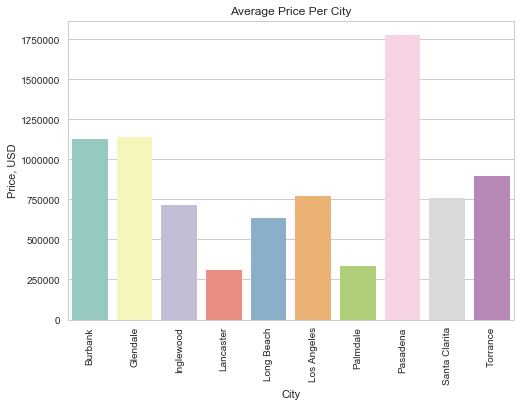

In [126]:
# group data by city and find the average housing growth for each cuty


# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x=zillow_gb.index, y="zestimate", data=zillow_gb, palette=sns.color_palette("Set3", 19))

plt.xticks(rotation=90)
plt.ylabel("Price, USD")
plt.title("Average Price Per City")
plt.show()

# Save the figure
#plt.savefig("../Clean_Data/Housing_Growth.png")

In [127]:
zillow_box=zillow[['City','zestimate']]

In [137]:
Glendale=zillow_box[zillow_box['City']=='Glendale']     
Burbank=zillow_box[zillow_box['City']=='Burbank'] 
Inglewood=zillow_box[zillow_box['City']=='Inglewood'] 
Lancaster=zillow_box[zillow_box['City']=='Lancaster'] 
Pasadena=zillow_box[zillow_box['City']=='Pasadena'] 
Long_Beach=zillow_box[zillow_box['City']=='Long Beach'] 
Los_Angeles=zillow_box[zillow_box['City']=='Los Angeles'] 
Palmdale=zillow_box[zillow_box['City']=='Palmdale'] 
Santa_Clarita=zillow_box[zillow_box['City']=='Santa Clarita'] 
Torrance=zillow_box[zillow_box['City']=='Torrance'] 

In [139]:
Glendale=Glendale.sample(n=50)
Burbank=Burbank.sample(n=50)
Inglewood=Inglewood.sample(n=50)
Lancaster=Lancaster.sample(n=50)
Pasadena=Pasadena.sample(n=50)
Long_Beach=Long_Beach.sample(n=50)
Los_Angeles=Los_Angeles.sample(n=50)
Palmdale=Palmdale.sample(n=50)
Santa_Clarita=Santa_Clarita.sample(n=50)
Torrance=Torrance.sample(n=50)

In [146]:
Glendale.columns=['city','Glendal']
Burbank.columns=['city','Burbank']
Inglewood.columns=['city','Inglewood']
Lancaster.columns=['city','Lancaster']
Pasadena.columns=['city','Pasadena']
Long_Beach.columns=['city','Long_Beach']
Los_Angeles.columns=['city','Los_Angeles']
Palmdale.columns=['city','Palmdale']
Santa_Clarita.columns=['city','Santa_Clarita']
Torrance.columns=['city','Torrance']

In [150]:
Glendale=Glendale.reset_index()
Burbank=Burbank.reset_index()
Inglewood=Inglewood.reset_index()
Lancaster=Lancaster.reset_index()
Pasadena=Pasadena.reset_index()
Long_Beach=Long_Beach.reset_index()
Los_Angeles=Los_Angeles.reset_index()
Palmdale=Palmdale.reset_index()
Santa_Clarita=Santa_Clarita.reset_index()
Torrance=Torrance.reset_index()

In [152]:
df=pd.concat([Glendale.Glendal
           ,Burbank.Burbank
           ,Inglewood.Inglewood
           ,Lancaster.Lancaster
           ,Pasadena.Pasadena
           ,Long_Beach.Long_Beach
           ,Los_Angeles.Los_Angeles
           ,Palmdale.Palmdale
           ,Santa_Clarita.Santa_Clarita
           ,Torrance.Torrance],axis=1)

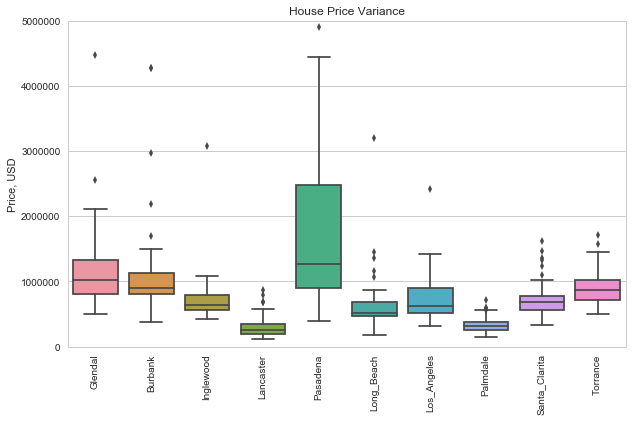

In [156]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.ylim(0,5000000)
plt.ylabel("Price, USD")
plt.title('House Price Variance')
plt.xticks(rotation=90)
plt.show()

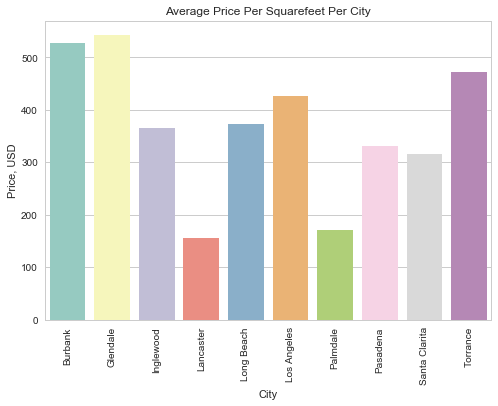

In [159]:
# group data by city and find the average housing growth for each cuty


# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x=zillow_gb.index, y="PP_sqft", data=zillow_gb, palette=sns.color_palette("Set3", 19))

plt.xticks(rotation=90)
plt.ylabel("Price, USD")
plt.title("Average Price Per Squarefeet Per City")
plt.show()

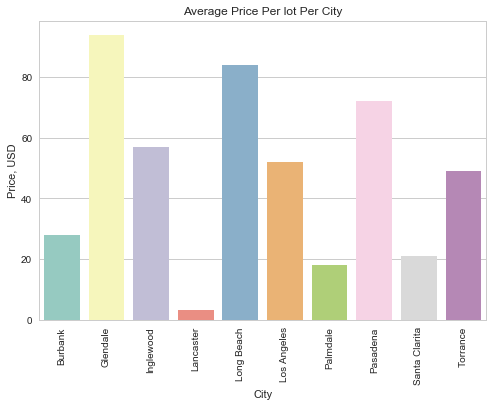

In [161]:
# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x=zillow_gb.index, y="PP_lot", data=zillow_gb, palette=sns.color_palette("Set3", 19))

plt.xticks(rotation=90)
plt.ylabel("Price, USD")
plt.title("Average Price Per lot Per City")
plt.show()

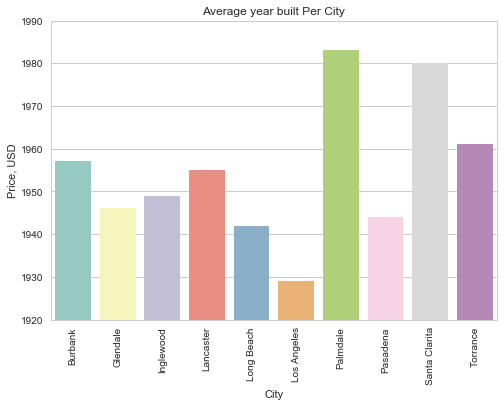

In [165]:
# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x=zillow_gb.index, y="year built", data=zillow_gb, palette=sns.color_palette("Set3", 19))

plt.xticks(rotation=90)
plt.ylim(1920,1990)
plt.ylabel("Price, USD")
plt.title("Average year built Per City")
plt.show()